In [30]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout
from abc import ABC, abstractmethod
import numpy as np


In [31]:
class Tree:
    
    def __init__(self, root):
        self.root = root
        self.labels = []
        root.setTree(self)
        self.generate(root)

        self.pos = None
        self.edges =  None
        self.colors = None
        self.weights = None
        self.node_colors = []

    @abstractmethod
    def generate(self, node):
        pass
    
    def addLabel(self, label: int):
        self.labels.append(label)

class Node:
    TEAL = "#e6f2f2"
    GOLD = "#fcc200"
    PURPLE = "#f9e6ec"
    RED = "#FF0000"

    colors = [TEAL, GOLD, PURPLE, RED]
    
    columns = []

    def __init__(self, label):
        self.tree = None
        self.predecessor = None
        self.successors = [] 
        self.label = label
        #self.col = 0
        self.row = 0

    def addSuccessor(self, successor):
        successor.row = self.row + 1
        if self.tree is not None and not successor.label in self.tree.labels:
            successor.setTree(self.tree)
            successor.predecessor = self
            self.successors.append(successor)
    
    def setTree(self, tree: Tree):
        self.tree = tree
        self.tree.addLabel(self.label)
        self.tree.genColCluster()

    def getType(label):
        if (label + 1) % 3 == 0:
            if ((label-1)/4)%2 == 0:
                return 4
            return 1
        elif label % 3 == 0:
            return 2
        elif (label - 1) % 3 == 0:
            return 3
        return -1

In [32]:
def V(num):
    return 4*num+1

def S(num):
    return 2*num+1

def fG(num):
    return 2*num-1

def getType(num):
    if (num+1) %3 == 0:
        return "A"
    elif (num%3) == 0:
        return "B"
    elif (num-1)%3 == 0:
        return "C"

def ruleTwo(num):
        result = (num-1)/2
        r = 0
        k = 0

        while result % 2 != 0:
            result = (result-1)/2
            k+=1

        r = result/2

        if ((k) % 2 == 0 and r % 2 == 0) or ((k) % 2 != 0 and r % 2 != 0):
            return (True)
        else:
            return (False)

def isIncluded(arr, num):
    for i in arr:
        if i == num:
            return True
        
    return False


In [33]:
#Aberkane Tree
class AberkaneTree(Tree):
    def __init__(self, root: Node, height: int):
        self.height = height
        self.columns = []
        self.predecessor_con = []
        self.successor_con = []
        self.connection_id = 0
        self.movement_con = []
        super().__init__(root)   

    def generate(self, node: Node):
        mid_in_range = True
        left_in_range = True
        right_in_range = True

        label = node.label
        h = self.height - 1
        b_leaf = 1
        for i in range(1,h+1):
            b_leaf = int(b_leaf * 2 + 1) 

        if (node.label * 4 + 1) > (b_leaf):
            mid_in_range = False
        else:
            mid_in_range = True

        if (node.label * 2 + 1) > (b_leaf):
            right_in_range = False
        else:
            right_in_range = True

        if (node.label * 2 - 1) > (b_leaf):
            left_in_range = False
        else:
            left_in_range = True

        if node.label == 1:         
            right_child =  Node(node.label * 2 + 1)      
            node.addSuccessor(right_child)          
            self.generate(right_child)      
            self.predecessor_con.append(1)
            self.successor_con.append(3) 
            self.predecessor_con.append(1)
            self.successor_con.append(5) 
            self.connection_id = self.connection_id + 2
        else:          
            if mid_in_range == True:
                middle_child = Node(node.label * 4 + 1)          
            if right_in_range == True:
                right_child = Node(node.label * 2 + 1)
            if left_in_range == True:
                left_child = Node(node.label * 2 - 1)

            if right_in_range == True:
                node.addSuccessor(right_child)
            if mid_in_range == True:
                node.addSuccessor(middle_child)
            if left_in_range == True:
                node.addSuccessor(left_child)

            if right_in_range == True:
                self.generate(right_child)
                self.predecessor_con.append(node.label)
                self.successor_con.append(right_child.label)
                self.connection_id = self.connection_id + 1
            if mid_in_range == True:
                self.generate(middle_child)
                self.predecessor_con.append(node.label)
                self.successor_con.append(middle_child.label)
                self.connection_id = self.connection_id + 1
            if left_in_range == True:
                self.generate(left_child)
                self.predecessor_con.append(node.label)
                self.successor_con.append(left_child.label)
                self.connection_id = self.connection_id + 1
        
    def genColCluster(self):       
        aberkane_height = self.height-1
        col_arr = []
        big_leaf = int(1)
        used_nodes = []
        col_position = 0
        is_right = False
        is_left = False
        right_node = 0
        left_node = 0
        movement_con = []

        for i in range(1,aberkane_height+1):
            big_leaf = int(big_leaf * 2 + 1) 

        for j in range(1,big_leaf+1, 2):
            is_part = False
            col_build = []

            for x in used_nodes:
                if j == x:
                    is_part = True
            
            if is_part == False:
                used_nodes.append(int(j))
                col_build.append(int(j))

                right_node = int((j-1)/2)
                left_node = int((j+1)/2)
                    
                is_right = False
                is_left = False

                for a in used_nodes:      
                    if j == 1:
                        is_right = True
                        is_left = True
                    elif a == int(right_node):
                        is_right = True
                    elif a == int(left_node):
                        is_left = True
                            
                test_node = j*4+1
                while(test_node < big_leaf):
                    test_node_is_part = False
                    for y in used_nodes:
                        if test_node == y:
                            test_node_is_part = True
                            test_node = big_leaf+1
                    if test_node_is_part == False:
                        col_build.append(int(test_node))
                        used_nodes.append(int(test_node))
                        test_node = test_node * 4 + 1

                col_position
                len_col_i = 0
                len_columns = len(col_arr)

                for i in range(0,len_columns):
                    len_col_i = len(col_arr[i])
                    for j in range(0, len_col_i):
                        if col_arr[i][j] == left_node or col_arr[i][j] == right_node:
                            col_position = i 

                if is_left == True and is_right == True:
                    col_arr.append(col_build)
                    movement_con.append(left_node)
                elif is_left == True:
                    if col_position == 0:
                        col_arr.insert(col_position, col_build)
                    else:
                        col_arr.insert(col_position, col_build)
                    
                    movement_con.append(col_build[0])

                elif is_right == True:
                    col_arr.insert(col_position+1, col_build)
                    
        self.movement_con = movement_con
        self.columns = col_arr
        return
    

    def genGraphData(self, G):              
        
        big_leaf = 2**(self.height)-1

        for i in range(3,2**(self.height),2):
            
            if(i*4+1 <= big_leaf):
                G.add_edge((i),(i*4+1), color='white',weight=1)
            if(i*2+1 <= big_leaf):
                G.add_edge((i),(i*2+1), color='white',weight=1)   
            if(i*2-1 <= big_leaf):
                G.add_edge((i),(i*2-1), color='white',weight=1)  

        G.add_edge((1),5, color='black',weight=1)
        G.add_edge((1),3, color='black',weight=1)
        
        used = []
        proven = []

        rTwoCon = []
        rTwoCon.append(1)
        rTwoCon.append(3)

        proven.append(3)
        proven.append(5)
        
        while len(proven) > 0:
            proven.sort()
            print(proven)
            for i in proven:

                if isIncluded(used, i) == False:
                    used.append(i)
                    # RULE 1 : if x is orange V(x) becomes orange 
                    if V(i) <= big_leaf + 1:
                        proven.append(V(i))
                        
                        if V(i) == 17:
                            G.add_edge(1, 17, color='yellow',weight=5)
                        else:
                            G.add_edge(i,V(i),color='black',weight=5)
                    
                    
                    
                    # RULE 2 : if x is orange S(x) becomes orange (under the precise conditions of rule 2)
                    r2 = ruleTwo(i)
                    if r2: 
                        if S(i) <= big_leaf + 1:
                            proven.append(S(i))
                            if S(i) == 17:
                                G.add_edge(1, 17, color='yellow',weight=5)

                            
                            else:
                                G.add_edge(i,S(i),color='black',weight=5)
                                rTwoCon.append(i)
                                rTwoCon.append(S(i)) 

                    # # RULE 3 : if x is orange and of type C then (4x-1)/3 becomes orange

                    if Node.getType(i) == 3:
                        
                        value3 = int((4*i-1)/3)

                        if value3 <= big_leaf + 1:
                            proven.append(value3)
                            #print(value3)
                            #print(value3)
                            if value3 == 17:
                                G.add_edge(1, 17, color='yellow',weight=5)
                            
                            elif int((value3-1)/2) %2 != 0:
                                G.add_edge( int((value3-1)/2), value3, color='yellow',weight=5)

                            elif int((value3+1)/2) %2 != 0:
                                G.add_edge( int((value3+1)/2), value3, color='yellow',weight=5)

                            elif int((value3-1)/4) %2 != 0:
                                G.add_edge( int((value3-1)/4), value3, color='yellow',weight=5)


                    # # RULE 4 : if x is orange and of type A then G(x)/3 becomes orange
                    
                    if Node.getType(i) == 1 or Node.getType(i) == 4:
                        
                        value4 = int(fG(i)/3)
                        
                        proven.append(value4)
                        #print(value4)
                        if value4 == 17:
                            G.add_edge(1, 17, color='yellow',weight=5)
                        elif ((value4-1)/2) % 2 != 0:
                            G.add_edge((fG(i)/3), ((value4-1)/2), color='yellow',weight=5)

                        elif ((value4-1)/4) % 2 != 0:
                            G.add_edge(value4, ((value4-1)/2), color='yellow',weight=5)

                        elif ((value4+1)/2) % 2 != 0:
                            G.add_edge(value4, ((value4-1)/2) ,color='yellow',weight=5)
                        proven.remove(i)
                        break        
                    #print(i)
                    proven.remove(i)
                else:
                    proven.remove(i)
        
        for con in range(0,len(rTwoCon)-2,2):
            G.add_edge(rTwoCon[con], rTwoCon[con+1],color='black',weight=5)

        for node in G:
            color_type = Node.getType(node)
            self.node_colors.append(Node.colors[color_type-1])
        self.edges = G.edges()
        self.colors = [G[u][v]['color'] for u,v in self.edges]
        self.weights = [G[u][v]['weight'] for u,v in self.edges]

    def generatePos(self, label_value):
        col_counter = 0
        len_col_i = 0
        len_columns = len(self.columns)
        col = 0.0
        row = 0.0
        for i in range(0,len_columns):
            len_col_i = len(self.columns[i])
            for j in range(0, len_col_i):             
                if self.columns[i][j] == int(label_value):
                    col = float(i+1)
                    break
        if label_value == 1:
            row = -2*float(1) * 0.2
        elif label_value == 3:
            row = -1.5*float(2) * 0.2  
        else:
            for i in range(2,int(label_value)):
                if label_value > (2**(i-1)) and label_value < (2**i):
                    row = -1*float(i+1) * 0.2
                    break
        return (col, row)

    def generatePosArr(self):
        pos1 = {}
        len_col_i = 0
        len_columns = len(self.columns)
        for i in range(0,len_columns):
            len_col_i = len(self.columns[i])
            for j in range(0, len_col_i):
                pos1[self.columns[i][j]] = self.generatePos(self.columns[i][j])
        self.pos = pos1
        return


In [34]:
root = Node(1)
aberkane_tree = AberkaneTree(root, 5) 
pos = aberkane_tree.generatePosArr()
G = nx.Graph()
aberkane_tree.genGraphData(G)
w = 5
h = 5
for i in range(1,(aberkane_tree.height)):
    w = w * 1.4
    h = h + 1
plt.figure(figsize=(w, h))
plt.gca().invert_yaxis()
nx.draw(G, edges = aberkane_tree.edges, edge_color=aberkane_tree.colors, width=aberkane_tree.weights,   node_color=aberkane_tree.node_colors,node_shape = "s", node_size=2000, pos=aberkane_tree.pos, with_labels=True,  linewidths=1)

[3, 5]
[5, 17]
[3, 17, 21]
[17]
[11]
[7, 23]
[9, 15, 19, 23]
[15, 23, 25]
[23]
[15]


[3, 5]
17
11
[5, 11, 35, 53]
3
[3, 11, 21, 35, 53]
35
[11, 35, 35]
7
[7, 23, 35, 35, 45]
9
23
[9, 15, 23, 23, 29, 35, 45]
15
[15, 15, 19, 23, 29, 35, 37, 45]
25
19
[15, 19, 23, 25, 35, 37, 45, 61]
[19, 25, 37, 61]
49
[25, 61]
33
[33, 61]
[61]


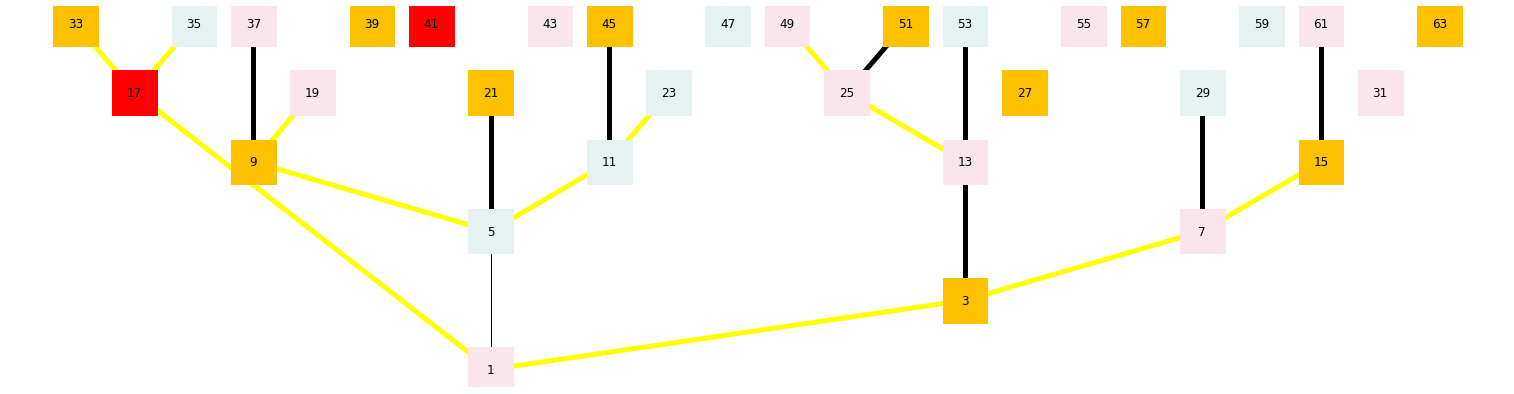

In [27]:
root = Node(1)
aberkane_tree = AberkaneTree(root, 6) 
pos = aberkane_tree.generatePosArr()
G = nx.Graph()
aberkane_tree.genGraphData(G)
w = 5
h = 2
for i in range(1,(aberkane_tree.height)):
    w = w * 1.4
    h = h + 1
plt.figure(figsize=(w, h))
plt.gca().invert_yaxis()
nx.draw(G, edges = aberkane_tree.edges, edge_color=aberkane_tree.colors, width=aberkane_tree.weights,   node_color=aberkane_tree.node_colors,node_shape = "s", node_size=2000, pos=aberkane_tree.pos, with_labels=True,  linewidths=1)

In [28]:
root = Node(1)
aberkane_tree = AberkaneTree(root, 7) 
pos = aberkane_tree.generatePosArr()
G = nx.Graph()
aberkane_tree.genGraphData(G)
w = 5
h = 2
for i in range(1,(aberkane_tree.height)):
    w = w * 1.4
    h = h + 1
plt.figure(figsize=(w, h))
plt.gca().invert_yaxis()
nx.draw(G, edges = aberkane_tree.edges, edge_color=aberkane_tree.colors, width=aberkane_tree.weights,   node_color=aberkane_tree.node_colors,node_shape = "s", node_size=2000, pos=aberkane_tree.pos, with_labels=True,  linewidths=1)

[3, 5]
17
11
[5, 11, 35, 53, 69]
3
[3, 11, 21, 35, 53, 69]
35
[11, 35, 35, 69, 85]
7
[7, 23, 35, 35, 45, 69, 85]
9
23
[9, 15, 23, 23, 29, 35, 45, 69, 85]
15
[15, 15, 19, 23, 29, 35, 37, 45, 69, 85, 93]
25
19
[15, 19, 23, 25, 35, 37, 45, 61, 69, 77, 85, 93, 117]
113
[19, 25, 37, 61, 77, 93, 113]
49
51
[25, 49, 51, 61, 93, 113]
33
67
[33, 49, 51, 61, 67, 113]
89
[49, 61, 89, 113]
65
59
[59, 61, 65, 99, 113]
39
[39, 61, 65, 99, 113, 119]
43
[43, 61, 79, 99, 113, 119]
57
105
75
[57, 61, 75, 87, 99, 105, 119]
79
[61, 79, 87, 105, 115]
81
[79, 81, 105]
[81]


[3, 5]
17
11
[5, 11, 35, 53, 69]
3
[3, 11, 21, 35, 53, 69]
35
[11, 35, 35, 69, 85, 213]
7
[7, 23, 35, 35, 45, 69, 85, 213]
9
23
[9, 15, 23, 23, 29, 35, 45, 69, 85, 141, 213]
15
[15, 15, 19, 23, 29, 35, 37, 45, 69, 85, 93, 141, 213]
25
19
[15, 19, 23, 25, 35, 37, 45, 61, 69, 77, 85, 93, 117, 141, 213]
113
75
[19, 25, 37, 61, 75, 77, 93, 141, 181, 227]
49
241
99
[25, 49, 61, 77, 99, 141, 151, 227, 241]
33
81
201
163
[33, 49, 77, 81, 101, 141, 163, 201, 205, 227]
51
[49, 51, 67, 81, 101, 133, 141, 163, 201, 205, 227]
65
89
67
[51, 65, 67, 81, 89, 99, 133, 141, 163, 197, 201, 205, 227]
59
[59, 65, 81, 99, 133, 141, 163, 179, 197, 201, 205, 227]
39
[39, 65, 81, 99, 119, 133, 141, 163, 179, 197, 201, 205, 227, 237]
79
[65, 79, 79, 99, 133, 141, 157, 163, 163, 179, 197, 201, 205, 227, 237]
43
[43, 79, 79, 99, 131, 133, 141, 157, 163, 163, 179, 197, 201, 205, 227, 237]
57
105
87
[57, 79, 87, 87, 99, 105, 133, 141, 157, 163, 163, 173, 179, 197, 201, 205, 227, 237]
177
209
217
119
[79, 87, 105, 

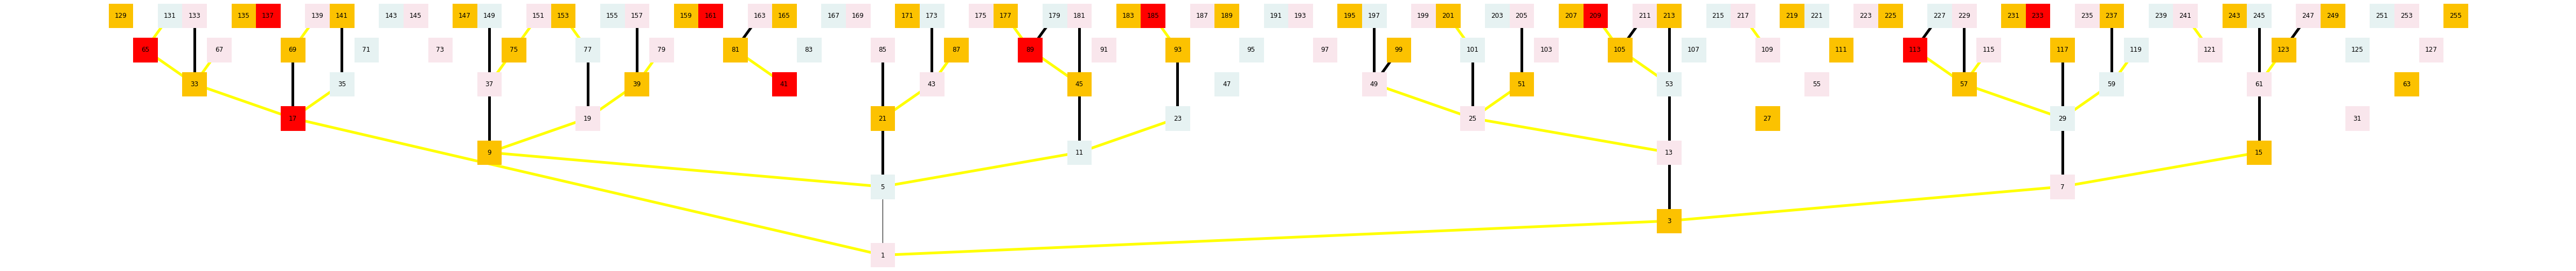

In [29]:
root = Node(1)
aberkane_tree = AberkaneTree(root, 8) 
pos = aberkane_tree.generatePosArr()
G = nx.Graph()
aberkane_tree.genGraphData(G)
w = 5
h = 2
for i in range(1,(aberkane_tree.height)):
    w = w * 1.5
    h = h + 1
plt.figure(figsize=(w, h))
plt.gca().invert_yaxis()
nx.draw(G, edges = aberkane_tree.edges, edge_color=aberkane_tree.colors, width=aberkane_tree.weights,   node_color=aberkane_tree.node_colors,node_shape = "s", node_size=2000, pos=aberkane_tree.pos, with_labels=True,  linewidths=1)

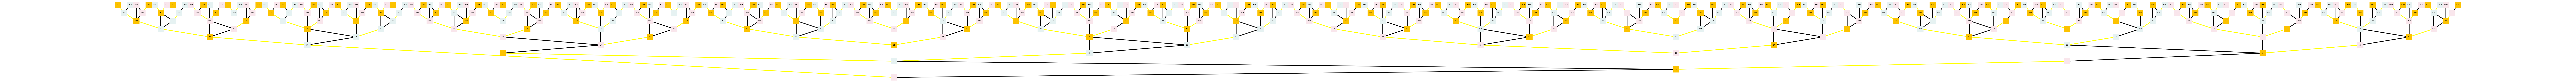

In [13]:
root = Node(1)
aberkane_tree = AberkaneTree(root, 10)
pos = aberkane_tree.generatePosArr()
G = nx.Graph()
aberkane_tree.genGraphData(G)
w = 5
h = 2
for i in range(1,(aberkane_tree.height)):
    w = w * 1.6
    h = h + 1
plt.figure(figsize=(w, h))
plt.gca().invert_yaxis()
nx.draw(G, edges = aberkane_tree.edges, edge_color=aberkane_tree.colors, width=aberkane_tree.weights, font_size = 8, node_color=aberkane_tree.node_colors,node_shape = "s", node_size=250, pos=aberkane_tree.pos, with_labels=True,  linewidths=1)

In [8]:
root = Node(1)
aberkane_tree = AberkaneTree(root, 12)
pos = aberkane_tree.generatePosArr()
G = nx.Graph()
aberkane_tree.genGraphData(G)
w = 800
h = 20
#for i in range(1,(aberkane_tree.height)):
#    w = w * 1.6
#    h = h + 1
plt.figure(figsize=(w, h))
plt.gca().invert_yaxis()
nx.draw(G, edges = aberkane_tree.edges, edge_color=aberkane_tree.colors, width=aberkane_tree.weights, font_size = 8, node_color=aberkane_tree.node_colors,node_shape = "s", node_size=250, pos=aberkane_tree.pos, with_labels=True,  linewidths=1)

In [21]:
## Rule 3

import math

def V(num):
    return 4*num+1

def S(num):
    return 2*num+1

def G(num):
    return 2*num-1

def getType(num):
    if (num+1) %3 == 0:
        return "A"
    elif (num%3) == 0:
        return "B"
    elif (num-1)%3 == 0:
        return "C"


numArr = []
xMax = 6
nMax = 1

for n in range(1,nMax+1):

#n = 4

    for x in range(1,xMax+1):
        if x%3 == 0:
            True
        else:
            y = 3**n * x

            for i in range(1,n+1):
                firstPart = V((4**i)*(3**(n-i)*x))
                secondPart = S(firstPart*x)
                firstType = getType(firstPart)
                secondType = getType(secondPart)

                numArr.append([y, firstPart, firstType])
                numArr.append([y, secondPart, secondType])

    
print(numArr)


[[3, 17, 'A'], [3, 35, 'A'], [6, 33, 'B'], [6, 133, 'C'], [12, 65, 'A'], [12, 521, 'A'], [15, 81, 'B'], [15, 811, 'C']]


In [9]:
## Rule 4

import math

def V(num):
    return 4*num+1

def S(num):
    return 2*num+1

def G(num):
    return 2*num-1

def getType(num):
    if (num+1) %3 == 0:
        return "A"
    elif (num%3) == 0:
        return "B"
    elif (num-1)%3 == 0:
        return "C"


numArr = []
xMax = 5
nMax = 5

for n in range(1,nMax+1):

    for x in range(1,xMax+1):
        if x%3 == 0:
            True
        else:
            y = S(3**n * x)

            for i in range(1,n+1):
                firstPart = S((4**i)*(3**(n-i)*x))
                secondPart = S(firstPart*x)
                firstType = getType(firstPart)
                secondType = getType(secondPart)

                numArr.append([y, firstPart, firstType])
                numArr.append([y, secondPart, secondType])

    
print(numArr)

[[7, 9, 'B'], [7, 19, 'C'], [13, 17, 'A'], [13, 69, 'B'], [25, 33, 'B'], [25, 265, 'C'], [31, 41, 'A'], [31, 411, 'B'], [19, 25, 'C'], [19, 51, 'B'], [19, 33, 'B'], [19, 67, 'C'], [37, 49, 'C'], [37, 197, 'A'], [37, 65, 'A'], [37, 261, 'B'], [73, 97, 'C'], [73, 777, 'B'], [73, 129, 'B'], [73, 1033, 'C'], [91, 121, 'C'], [91, 1211, 'A'], [91, 161, 'A'], [91, 1611, 'B'], [55, 73, 'C'], [55, 147, 'B'], [55, 97, 'C'], [55, 195, 'B'], [55, 129, 'B'], [55, 259, 'C'], [109, 145, 'C'], [109, 581, 'A'], [109, 193, 'C'], [109, 773, 'A'], [109, 257, 'A'], [109, 1029, 'B'], [217, 289, 'C'], [217, 2313, 'B'], [217, 385, 'C'], [217, 3081, 'B'], [217, 513, 'B'], [217, 4105, 'C'], [271, 361, 'C'], [271, 3611, 'A'], [271, 481, 'C'], [271, 4811, 'A'], [271, 641, 'A'], [271, 6411, 'B'], [163, 217, 'C'], [163, 435, 'B'], [163, 289, 'C'], [163, 579, 'B'], [163, 385, 'C'], [163, 771, 'B'], [163, 513, 'B'], [163, 1027, 'C'], [325, 433, 'C'], [325, 1733, 'A'], [325, 577, 'C'], [325, 2309, 'A'], [325, 769, 'C'

In [11]:
#Rule 5

import math

def V(num):
    return 4*num+1

def S(num):
    return 2*num+1

def G(num):
    return 2*num-1

def getType(num):
    if (num+1) %3 == 0:
        return "A"
    elif (num%3) == 0:
        return "B"
    elif (num-1)%3 == 0:
        return "C"


numArr = []
xMax = 5
nMax = 5

for n in range(1,nMax+1):

    for x in range(1,xMax+1):
        if x%3 == 0:
            True
        else:
            y = G(3**n * x)

            if (y+1)%3 == 0:

                for i in range(1,n+1):
                    firstPartSave = G((3**(n-i)*x))
                    secondPartSave = G((3**(n-i)*x))

                    for j in range(0,i):
                        firstPartSave = S(firstPartSave)
                    
                    for m in range(0,i+1):
                        secondPartSave = S(secondPart)



                    firstPart = firstPartSave
                    secondPart = secondPartSave
                    firstType = getType(firstPart)
                    secondType = getType(secondPart)

                    numArr.append([y, firstPart, firstType])
                    numArr.append([y, secondPart, secondType])

    
print(numArr)


[[5, 3, 'B'], [5, 204823, 'C'], [11, 7, 'C'], [11, 409647, 'B'], [23, 15, 'B'], [23, 819295, 'C'], [29, 19, 'C'], [29, 1638591, 'B'], [17, 11, 'A'], [17, 3277183, 'C'], [17, 7, 'C'], [17, 6554367, 'B'], [35, 23, 'A'], [35, 13108735, 'C'], [35, 15, 'B'], [35, 26217471, 'B'], [71, 47, 'A'], [71, 52434943, 'C'], [71, 31, 'C'], [71, 104869887, 'B'], [89, 59, 'A'], [89, 209739775, 'C'], [89, 39, 'B'], [89, 419479551, 'B'], [53, 35, 'A'], [53, 838959103, 'C'], [53, 23, 'A'], [53, 1677918207, 'B'], [53, 15, 'B'], [53, 3355836415, 'C'], [107, 71, 'A'], [107, 6711672831, 'B'], [107, 47, 'A'], [107, 13423345663, 'C'], [107, 31, 'C'], [107, 26846691327, 'B'], [215, 143, 'A'], [215, 53693382655, 'C'], [215, 95, 'A'], [215, 107386765311, 'B'], [215, 63, 'B'], [215, 214773530623, 'C'], [269, 179, 'A'], [269, 429547061247, 'B'], [269, 119, 'A'], [269, 859094122495, 'C'], [269, 79, 'C'], [269, 1718188244991, 'B'], [161, 107, 'A'], [161, 3436376489983, 'C'], [161, 71, 'A'], [161, 6872752979967, 'B'], [